# Marlon Diaz - Product Analytics
# This notebook presents my research approach using data mining on Facebook performance metrics.
# Identifying potential for strategic insights allowing stakeholders to drive decisions and draw actions.
# Exercise found on Kaggle

### data source
Sérgio Moro, Paulo Rita, Bernardo Vala,
Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach,
Journal of Business Research,
Volume 69, Issue 9,
2016,
Pages 3341-3351,
ISSN 0148-2963,
https://doi.org/10.1016/j.jbusres.2016.02.010.


In [4]:
import pandas as pd

In [5]:
fb_data = pd.read_csv('dataset_Facebook.csv',  sep=';')

# Exploratory Data Analysis (EDA)
# The performance metrics collected characterized posts' performance in several aspects.

In [6]:
fb_data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


# Detect null values in a Dataset using if statements:

In [7]:
# Check first if there are any null values in the DataFrame
if fb_data.isnull().values.any():
    print("The Dataset contains null values.")
else:
    print("The Dataset does not contain null values")

The Dataset contains null values.


# Identify columns with null values
# Detect rows with null values in the DataFrame

In [8]:
# Check which columns have null values
columns_with_null = fb_data.columns[fb_data.isnull().any()].tolist()
# Detect which rows have null values
rows_with_null = fb_data[fb_data.isnull().any(axis='columns')]

In [9]:
print('Here is a list of the columns with null values', columns_with_null)

Here is a list of the columns with null values ['Paid', 'like', 'share']


In [198]:
rows_with_null

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,NaN,2
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,NaN,7
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,NaN,18
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


# Create a new DataFrame to show both rows and columns with null values

- "Row Number": This column contains the index of the rows where null values are present. I used `rows_with_null.index` to obtain the index values of the rows with null values.
- In Python, list comprehension is a concise way to create lists. It consists of square brackets `[]` containing an expression followed by a `for` clause, then zero or more `for` or `if` clauses.
- The expression `[columns_with_null for _ in range(len(rows_with_null))]` creates a list for the "Columns with Null Values" column.
- I use `for _ in range(len(rows_with_null))` to iterate as many times as there are rows with null values. Here, the underscore `_` is used as a variable name to indicate that the value of the variable is not used within the loop. Essentially, the purpose of this iteration is to repeat the `columns_with_null` list for each corresponding row in `rows_with_null`.
-

To summarize, the list comprehension is structured to repeat the `columns_with_null` list for as many rows as there are in `rows_with_null`. This results in a list of columns with null values for each corresponding row, which is later used to populate the "Columns with Null Values" column in the `null_values_df` DataFrame.

By creating this structured list, we ensure that the `null_values_df` DataFrame presents a comprehensive overview of rows and respective columns with null values in a tabulated format.

In [11]:
null_values_df = pd.DataFrame({'Row Number': rows_with_null.index, 'Columns with Null Values': [columns_with_null for _ in range(len(rows_with_null))]})

In [12]:
null_values_df

,Row Number,Columns with Null Values
0,111,"[Paid, like, share]"
1,120,"[Paid, like, share]"
2,124,"[Paid, like, share]"
3,164,"[Paid, like, share]"
4,499,"[Paid, like, share]"


# CLEAN DATA
- Fill in null values with zero
- Use the fillna() method in pandas to fill in null values with 0 in the dataset.

In [13]:
fb_data.fillna(0, inplace=True)

In [59]:
if fb_data.isnull().values.any():
    print("The Dataset contains null values.")
else:
    print("The Dataset does not contain null values")

The Dataset does not contain null values


# Data Mining
A data mining approach typically includes phases such as data understanding, data preparation, modeling, and evaluation

In [169]:
fb_data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


# Getting a basic understanding of data
# Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
<br />
# DataFrame.describe(percentiles=None, include=None, exclude=None)

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [58]:
fb_data.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
5%,90804.000000,1.000000,1.950000,1.000000,2.000000,0.000000,1326.55000,2.451700e+03,169.750000,123.950000,153.950000,1.603050e+03,912.750000,130.750000,0.00000,7.000000,1.000000,9.950000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
95%,138895.000000,3.000000,12.000000,7.000000,14.000000,1.000000,54319.20000,1.102385e+05,2581.250000,2319.400000,4540.500000,4.858450e+04,22847.200000,1834.250000,25.05000,534.050000,76.050000,605.850000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


# List of input and output features to be modeled from the compiled data set

In [196]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

In [193]:
hasattr(fb_data['Type'],  "cat")

False

In [197]:
fb_data['Type'].dtype

dtype('O')

# KEY TO KNOW

# Notice there are 7 input features used for feeding the model
- Page total likes   - (Number of people who have liked the company's page.)
- Type             -   (Type of contentType of content)
- Category           - (Manual content)
- Post Month        -  (January - December)
- Post Weekday       - (Sunday - Saturday)
- Post Hour          - (0 - 23)
- Paid                - (Paid ads to Facebook)

# Notice there are 12 output features to be modeled to measure posts' performance
- Lifetime post total reach - (The number of people who saw a page post (unique users))
- Lifetime post total impressions - (Impressions are the number of times a post from a page is displayed, whether the post is clicked or not. People may see multiple impressions of the same post. For example, someone might see a Page update in News Feed once, and then a second time if a friend shares it)
- Lifetime engaged users - (The number of people who clicked anywhere in a post (unique users))
- Lifetime post consumers - (The number of people who clicked anywhere in a post)
- Lifetime post consumptions - (The number of clicks anywhere in a post)
- Lifetime post impressions by people who have liked a page - (Total number of impressions just from people who have liked a page)
- Lifetime post reach by people who like a page - (The number of people who saw a page post because they have liked that page (unique users))
- Lifetime people who have liked a page and engaged with a post - (The number of people who have liked a Page and clicked anywhere in a post (Unique users))
- Comments
- like
- Shares
- Total Interactions Column (It is the sum of the number of comments, likes, and shares of the post)

# Input Feature: Type
[Type of information: Categorization]
- photo
- status
- link
- video

In [153]:
type_column = fb_data['Type'].value_counts()
type_column

Type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

# Input Feature: Category
[Type of information: Categorization]
- action (special offers and contests)
- product (direct advertisement, explicit brand content)
- inspiration (non-explicit brand related content)

Is the only column created manually by the Facebook page managers. This categorization was a request from the company's senior marketing managers as it relates to the types of campaigns performed by this specific cosmetic company. It provides a manual categorization according to the campaign to which the content posted is associated.

In [187]:
category_column = fb_data['Category'].value_counts(normalize='True')
# normalize='True'
# Return proportions rather than frequencies.
category_column

Category
1    0.43
3    0.31
2    0.26
Name: proportion, dtype: float64

# Input Feature: Paid
[Type of information: Categorization]
If the company paid to Facebook for advertising
- yes
- no

In [155]:
paid_column = fb_data['Paid'].value_counts(normalize='True')
paid_column

Paid
0.0    0.722
1.0    0.278
Name: proportion, dtype: float64

# Seaborn Heatmap
# Compute Pairwise Correlation of Columns

    seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

    DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)

> Method of correlation:
- pearson : standard correlation coefficient
- kendall : Kendall Tau correlation coefficient
- spearman : Spearman rank correlation

In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.


source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

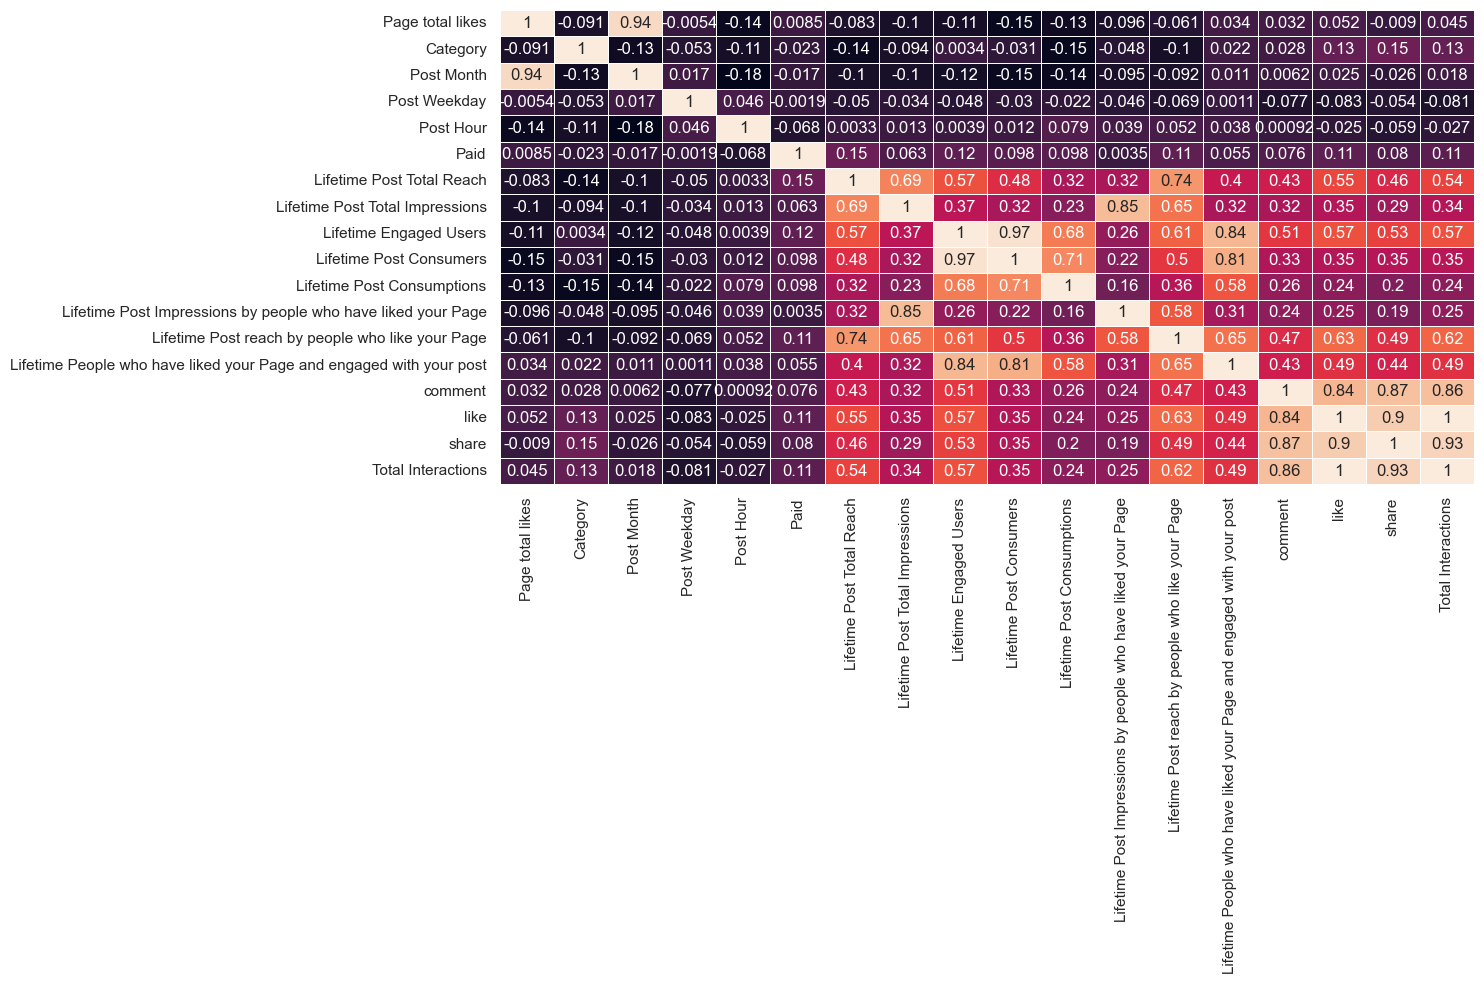

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.heatmap(fb_data.corr(method='pearson',numeric_only=True), annot=True, fmt='.2g',linewidths=.5, cbar=False)
plt.tight_layout()

# Let's feed the  model
# Exercise # 1
# Total Interaction (output) and Post  Month (input)

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property

In [17]:
interactions_by_month= fb_data.groupby(['Post Month'])['Total Interactions'].sum().reset_index()
interactions_by_month

,Post Month,Total Interactions
0,1,4015
1,2,6293
2,3,3494
3,4,10876
4,5,9483
5,6,7728
6,7,17082
7,8,7663
8,9,10026
9,10,10974


In [90]:
top_month = interactions_by_month.nlargest(12, 'Total Interactions')
top_month

,Post Month,Total Interactions
6,7,17082
9,10,10974
3,4,10876
11,12,10067
8,9,10026
4,5,9483
10,11,8359
5,6,7728
7,8,7663
1,2,6293


# Bar plot
Categorical distribution plots:


Text(0.5, 1.0, 'Total interactions by Month')

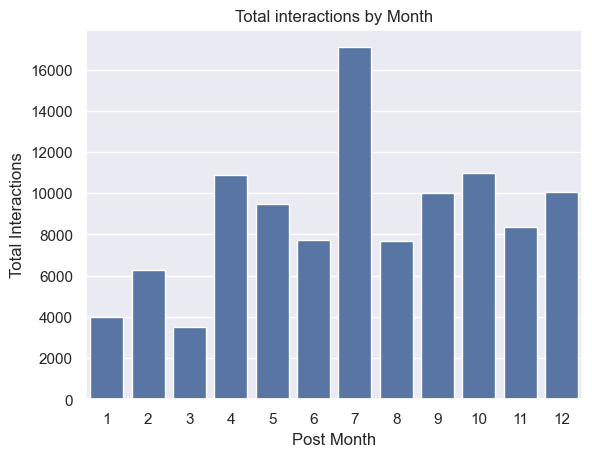

In [79]:
sns.barplot(x='Post Month',y='Total Interactions',data=interactions_by_month)
plt.title("Total interactions by Month")

<Axes: xlabel='Post Month', ylabel='Total Interactions'>

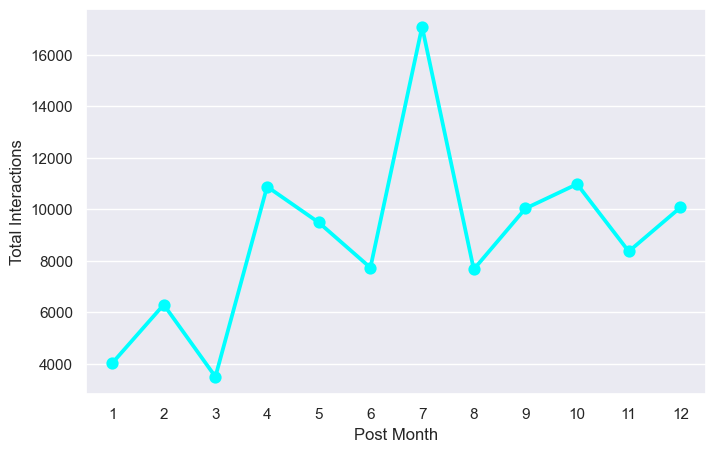

In [24]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Post Month',y='Total Interactions',data=interactions_by_month,color='aqua')

# Let's feed the  model
# Exercise # 2
# Total Interaction (output) and Post  Weekday (input)

In [94]:
interactions_by_weekdays = fb_data.groupby(['Post Weekday'])['Total Interactions'].sum().reset_index()
print(interactions_by_weekdays)

   Post Weekday  Total Interactions
0             1               16118
1             2               13230
2             3               18417
3             4               18758
4             5               13756
5             6               13187
6             7               12594


In [93]:
top_weekday = interactions_by_weekdays.nlargest(7, 'Total Interactions')
top_weekday

,Post Weekday,Total Interactions
3,4,18758
2,3,18417
0,1,16118
4,5,13756
1,2,13230
5,6,13187
6,7,12594


Text(0.5, 1.0, 'Total Interactions by Weekdays (Sun-Sat)')

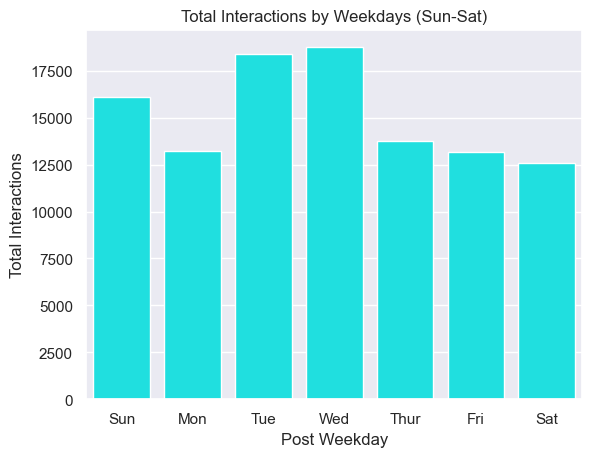

In [106]:
sns.barplot(x = 'Post Weekday', y = 'Total Interactions', data = interactions_by_weekdays, color = 'aqua')
handles = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
labels = [0,1,2,3,4,5,6,]
plt.xticks(labels, handles)
plt.title('Total Interactions by Weekdays (Sun-Sat)')

# Most post in the weekday was from Ads paid Facebook

<Axes: xlabel='Post Weekday', ylabel='count'>

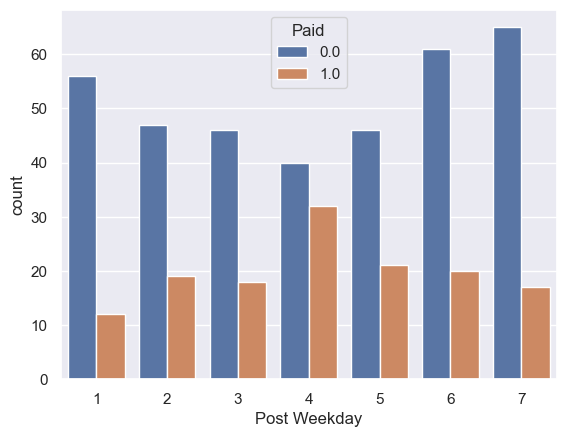

In [118]:
sns.countplot(data = fb_data, x = 'Post Weekday', hue = 'Paid', palette = 'deep')

Text(0.5, 1.0, 'Total Interactions by Weekday (Sun-Sat)')

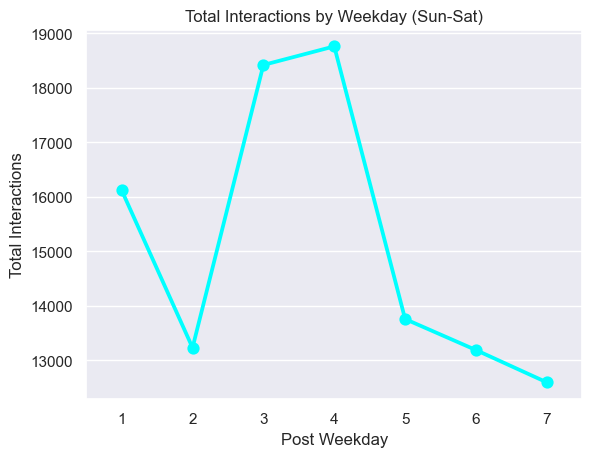

In [100]:
sns.pointplot(data = interactions_by_weekdays, x = 'Post Weekday', y = 'Total Interactions', color = 'aqua')
plt.title('Total Interactions by Weekday (Sun-Sat)')

# Let's feed the model
# Exercise # 3
# Total Interactions (output) and Post Hour

In [103]:
interactions_by_hour = fb_data.groupby(['Post Hour'])['Total Interactions'].sum().reset_index()
top_hour = interactions_by_hour.nlargest(22, 'Total Interactions')
top_hour

,Post Hour,Total Interactions
2,3,24002
9,10,19571
12,13,12741
4,5,8896
1,2,7453
10,11,6433
3,4,5883
11,12,5205
13,14,3993
8,9,3993


Text(0.5, 1.0, 'Total Interactions by Hour (0-23)')

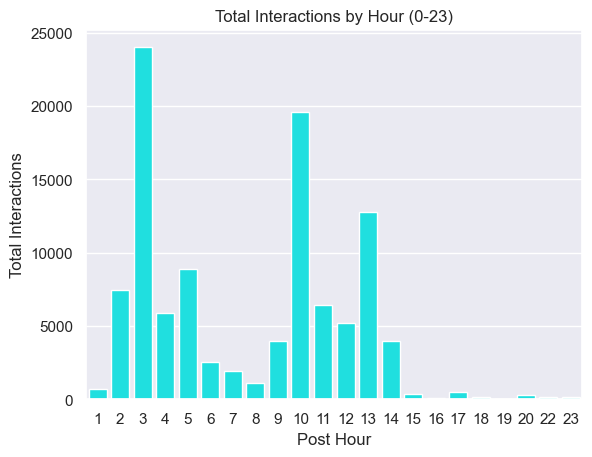

In [104]:
sns.barplot(data = interactions_by_hour, x = 'Post Hour', y = 'Total Interactions', color = 'aqua')
plt.title("Total Interactions by Hour (0-23)")

/var/folders/nn/8py85ddn3tx9p4rnk593dnfw0000gn/T/ipykernel_69889/590094377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(fb_data, x = 'Post Hour', palette = 'deep')


<Axes: xlabel='Post Hour', ylabel='count'>

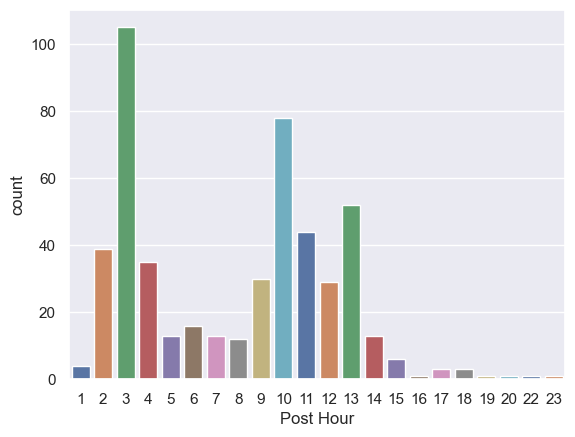

In [120]:
sns.countplot(fb_data, x = 'Post Hour', palette = 'deep')

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers?

(0.0, 1000.0)

<Figure size 1200x600 with 0 Axes>

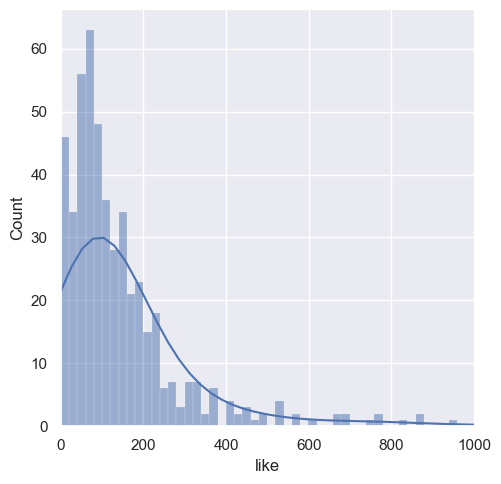

In [152]:
plt.figure(figsize = (12, 6))
sns.displot(fb_data, x = 'like', binwidth = 20, kde = True)
plt.xlim(0,1000)

# Plot data and regression model fits

(0.0, 1000.0)

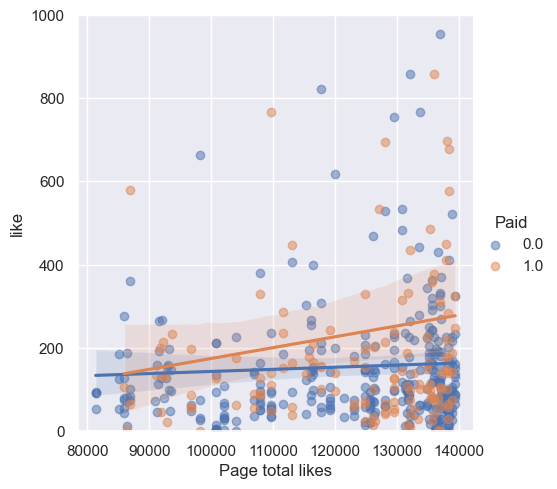

In [160]:
sns.lmplot(fb_data, x = 'Page total likes', y = 'like', hue = "Paid", fit_reg = True, scatter_kws = {'alpha': 0.5})
plt.ylim(0,1000)

/var/folders/nn/8py85ddn3tx9p4rnk593dnfw0000gn/T/ipykernel_69889/246698829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',y='Total Interactions',data=fb_data,palette='viridis')


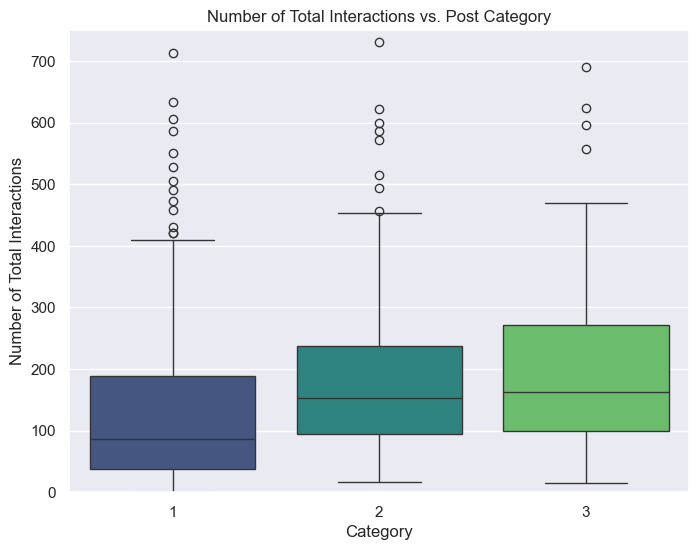

In [167]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Total Interactions',data=fb_data,palette='viridis')
plt.ylim(0,750)
plt.ylabel("Number of Total Interactions")
plt.title("Number of Total Interactions vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')

# Model the twelve numeric metrics related to the performance of posts published
- traditional linear regression
- support vector machines
(In machine learning, support vector machines (SVMs, also support vector networks) are supervised max-margin models with associated learning algorithms that analyze data for classification and regression analysis. )

A support vector machine (with a Gaussian kernel) is a nonparametric large-margin classifier.

Several data mining techniques can be used to model numeric variables, such as linear regression, support vector machines, and neural networks.

A sensitivity analysis has proved to be an effective method for extracting useful knowledge from black box models such as the support vector machines.

Such method consists in assessing model sensitivity to changes in the inputs by evaluating how the output predicted value changes when varying the input features through their range of values.